# EDA

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Check what sheets are available in the Excel file
xl_file = pd.ExcelFile("../data/SPFmicrodata.xlsx")
print("Available indicators:", xl_file.sheet_names)

# Load only the NGDP sheet
df = pd.read_excel("../data/SPFmicrodata.xlsx", sheet_name="NGDP")
print(f"\nLoaded NGDP sheet: {df.shape[0]} rows × {df.shape[1]} columns")
print("\nColumn names:", df.columns.tolist())

Available indicators: ['NGDP', 'PGDP', 'CPROF', 'UNEMP', 'EMP', 'INDPROD', 'HOUSING', 'TBILL', 'BOND', 'BAABOND', 'TBOND', 'RGDP', 'RCONSUM', 'RNRESIN', 'RRESINV', 'RFEDGOV', 'RSLGOV', 'RCBI', 'REXPORT', 'CPI5YR', 'PCE5YR', 'CPI10', 'PCE10', 'RGDP10', 'PROD10', 'STOCK10', 'BOND10', 'BILL10', 'PRGDP', 'PRPGDP', 'PRUNEMP', 'PRCCPI', 'PRCPCE', 'RECESS', 'CPI', 'CORECPI', 'PCE', 'COREPCE', 'UBAR', 'SPR_TBOND_TBILL', 'SPR_BAA_AAA', 'SPR_BAA_TBOND', 'SPR_AAA_TBOND', 'CPIF5', 'PCEF5', 'RR1_TBILL_PGDP', 'RR2_TBILL_PGDP', 'RR3_TBILL_PGDP', 'RR1_TBILL_CPI', 'RR2_TBILL_CPI', 'RR3_TBILL_CPI', 'RR1_TBILL_CCPI', 'RR2_TBILL_CCPI', 'RR3_TBILL_CCPI', 'RR1_TBILL_PCE', 'RR2_TBILL_PCE', 'RR3_TBILL_PCE', 'RR1_TBILL_CPCE', 'RR2_TBILL_CPCE', 'RR3_TBILL_CPCE']

Loaded NGDP sheet: 9145 rows × 12 columns

Column names: ['YEAR', 'QUARTER', 'ID', 'INDUSTRY', 'NGDP1', 'NGDP2', 'NGDP3', 'NGDP4', 'NGDP5', 'NGDP6', 'NGDPA', 'NGDPB']

Loaded NGDP sheet: 9145 rows × 12 columns

Column names: ['YEAR', 'QUARTER', 'ID', '

/Users/Parimah/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [7]:
# Plot histograms for each forecaster ID's time series
# First, let's see what columns we have and understand the data structure
print("Data shape:", df.shape)
print("\nFirst few rows:")
print(df.head())


# Print number of unique values in ID column
unique_forecasters = df["ID"].nunique()
print(f"\nUnique values in ID column: {unique_forecasters}")


Data shape: (9145, 12)

First few rows:
   YEAR  QUARTER  ID  INDUSTRY  NGDP1  NGDP2  NGDP3  NGDP4  NGDP5  NGDP6  \
0  1968        4   1       NaN  871.0  884.0  895.0  907.0  920.0  938.0   
1  1968        4   2       NaN  871.0  891.0  910.0  929.0  958.0  973.0   
2  1968        4   3       NaN  871.0  883.0  894.0  906.0  924.0  944.0   
3  1968        4   4       NaN  871.0  885.0  891.0  902.0  919.0  937.0   
4  1968        4   5       NaN  871.0  895.0  913.0  935.0  940.0  970.0   

   NGDPA  NGDPB  
0    NaN    NaN  
1    NaN    NaN  
2    NaN    NaN  
3    NaN    NaN  
4    NaN    NaN  

Unique values in ID column: 462


## Forecaster Time Series Analysis

This analysis examines the NGDP (Nominal GDP) forecasts from the Survey of Professional Forecasters dataset. Each forecaster (identified by ID) provides forecasts at different horizons (NGDP1 through NGDP6).

### Key Findings:
- **462 unique forecasters** in the dataset
- **Time period**: The data spans multiple years with quarterly observations
- **Forecast horizons**: NGDP1-NGDP6 represent different forecast horizons
- **Participation varies**: Some forecasters appear in many time periods, others in just a few


Below we show how many time periods each forecaster appears in the data. It doesn't check for consecutive participation or wether the forecaster has been rejoined to the survey after a while. 

Distribution of number of time periods per forecaster:
count    462.000000
mean      19.794372
std       25.806869
min        1.000000
25%        2.000000
50%        9.000000
75%       28.000000
max      126.000000
Name: count, dtype: float64


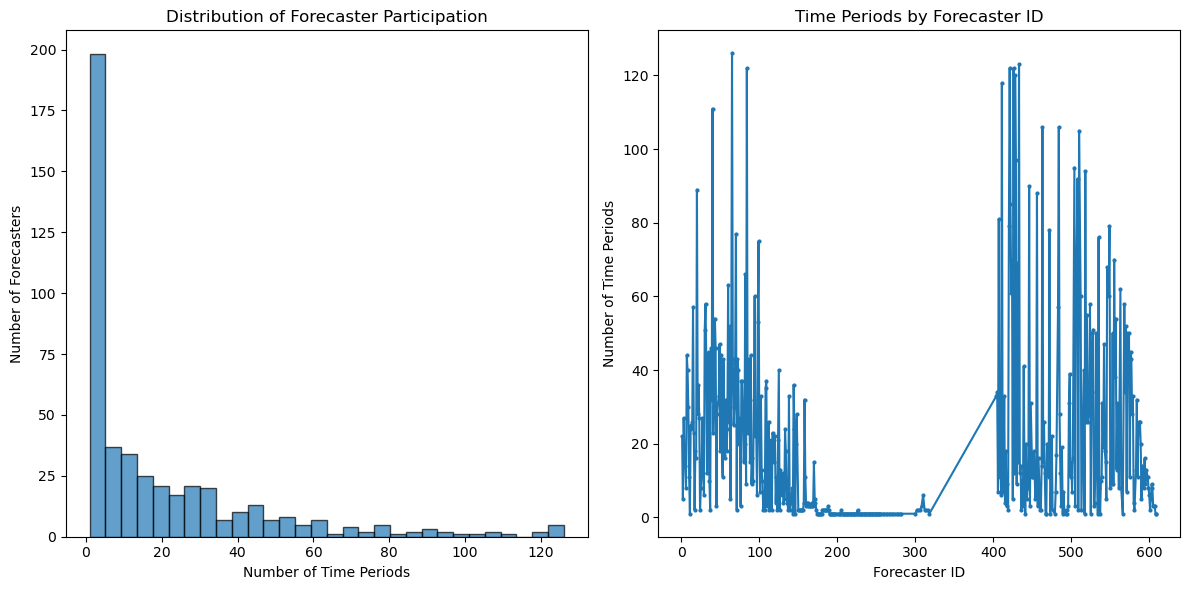


Forecasters with most participation:
ID
600    6
601    2
602    5
603    9
604    8
605    3
606    3
607    3
608    1
609    1
Name: count, dtype: int64

Forecasters with least participation:
ID
1     22
2      5
3     27
4     16
5     14
6      8
7     44
8     40
9     30
10    11
Name: count, dtype: int64


In [8]:
# Analyze how many time periods each forecaster appears in the data
forecaster_counts = df['ID'].value_counts().sort_index()

print("Distribution of number of time periods per forecaster:")
print(forecaster_counts.describe())

# Plot distribution of forecaster participation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(forecaster_counts.values, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Number of Time Periods')
plt.ylabel('Number of Forecasters')
plt.title('Distribution of Forecaster Participation')

plt.subplot(1, 2, 2)
plt.plot(forecaster_counts.index, forecaster_counts.values, marker='o', markersize=2)
plt.xlabel('Forecaster ID')
plt.ylabel('Number of Time Periods')
plt.title('Time Periods by Forecaster ID')

plt.tight_layout()
plt.show()

# Show forecasters with most and least participation
print(f"\nForecasters with most participation:")
print(forecaster_counts.tail(10))
print(f"\nForecasters with least participation:")
print(forecaster_counts.head(10))

In the following analysis, I have defined a new time index for the data and looked for the time series' length meaning looking for consecutive participation of the forecaster. 

In [40]:
# Analyze how many consecutive time periods each forecaster appears in the data
import numpy as np

# Create a time index for each row (year-quarter combination)
df['time_index'] = (df['YEAR'] - df['YEAR'].min()) * 4 + (df['QUARTER'] - 1)

# Function to find longest consecutive sequence with valid predictions
def find_consecutive_runs(group_data, forecast_cols):
    """
    Find the longest consecutive run and total number of runs where forecaster has valid predictions
    
    Parameters:
    - group_data: DataFrame for a single forecaster
    - forecast_cols: list of forecast column names to check for non-null values
    
    Returns:
    - max_consecutive: longest consecutive run
    - num_runs: number of separate runs
    - all_runs: list of all run lengths
    """
    if len(group_data) == 0:
        return 0, 0, []
    
    # For each time period, check if there's at least one non-null forecast
    group_data = group_data.sort_values('time_index')
    time_indices = []
    
    for idx, row in group_data.iterrows():
        # Check if at least one forecast column has a non-null value
        has_forecast = any(pd.notna(row[col]) for col in forecast_cols if col in row.index)
        if has_forecast:
            time_indices.append(row['time_index'])
    
    if len(time_indices) == 0:
        return 0, 0, []
    
    # Find consecutive runs
    runs = []
    current_run = 1
    
    for i in range(1, len(time_indices)):
        if time_indices[i] == time_indices[i-1] + 1:
            current_run += 1
        else:
            runs.append(current_run)
            current_run = 1
    runs.append(current_run)  # Add the last run
    
    return max(runs), len(runs), runs

# Define forecast columns
forecast_cols = ['NGDP1', 'NGDP2', 'NGDP3', 'NGDP4', 'NGDP5', 'NGDP6']

# Analyze consecutive periods for each forecaster
consecutive_stats = []
for forecaster_id, group in df.groupby('ID'):
    max_consecutive, num_runs, all_runs = find_consecutive_runs(group, forecast_cols)
    
    # Also count total periods with at least one valid forecast
    total_periods_with_forecasts = 0
    for idx, row in group.iterrows():
        has_forecast = any(pd.notna(row[col]) for col in forecast_cols if col in row.index)
        if has_forecast:
            total_periods_with_forecasts += 1
    
    consecutive_stats.append({
        'ID': forecaster_id,
        'total_periods': len(group),  # Total rows in dataset
        'total_periods_with_forecasts': total_periods_with_forecasts,  # Periods with valid forecasts
        'max_consecutive': max_consecutive,
        'num_runs': num_runs,
        'all_runs': all_runs
    })

consecutive_df = pd.DataFrame(consecutive_stats)

print("=== CONSECUTIVE PERIODS ANALYSIS ===")
print(f"\nAverage longest consecutive run: {consecutive_df['max_consecutive'].mean():.2f} periods")
print(f"Median longest consecutive run: {consecutive_df['max_consecutive'].median():.1f} periods")
print(f"Min consecutive run: {consecutive_df['max_consecutive'].min()} periods")
print(f"Max consecutive run: {consecutive_df['max_consecutive'].max()} periods")

print(f"\nAverage number of separate runs per forecaster: {consecutive_df['num_runs'].mean():.2f}")
print(f"Median number of separate runs: {consecutive_df['num_runs'].median():.1f}")

# Compare total periods vs consecutive periods
print("\n=== COMPARISON: Total vs Consecutive Periods ===")
print(f"Forecasters where total = max consecutive (continuous participation): {(consecutive_df['total_periods'] == consecutive_df['max_consecutive']).sum()} ({(consecutive_df['total_periods'] == consecutive_df['max_consecutive']).sum()/len(consecutive_df)*100:.1f}%)")
print(f"Forecasters with gaps (multiple runs): {(consecutive_df['num_runs'] > 1).sum()} ({(consecutive_df['num_runs'] > 1).sum()/len(consecutive_df)*100:.1f}%)")

# Show examples
print("\n=== EXAMPLES ===")
print("\nForecasters with longest consecutive runs:")
print(consecutive_df.nlargest(5, 'max_consecutive')[['ID', 'total_periods', 'max_consecutive', 'num_runs']])

print("\nForecasters with many gaps (most runs):")
print(consecutive_df.nlargest(5, 'num_runs')[['ID', 'total_periods', 'max_consecutive', 'num_runs']])



=== CONSECUTIVE PERIODS ANALYSIS ===

Average longest consecutive run: 8.15 periods
Median longest consecutive run: 4.0 periods
Min consecutive run: 0 periods
Max consecutive run: 95 periods

Average number of separate runs per forecaster: 4.36
Median number of separate runs: 2.0

=== COMPARISON: Total vs Consecutive Periods ===
Forecasters where total = max consecutive (continuous participation): 60 (13.0%)
Forecasters with gaps (multiple runs): 273 (59.1%)

=== EXAMPLES ===

Forecasters with longest consecutive runs:
      ID  total_periods  max_consecutive  num_runs
374  510            105               95         2
408  549             79               79         1
368  504             95               65         5
426  570             52               52         1
414  555             70               50         4

Forecasters with many gaps (most runs):
      ID  total_periods  max_consecutive  num_runs
98    99             75                7        32
295  423             61   

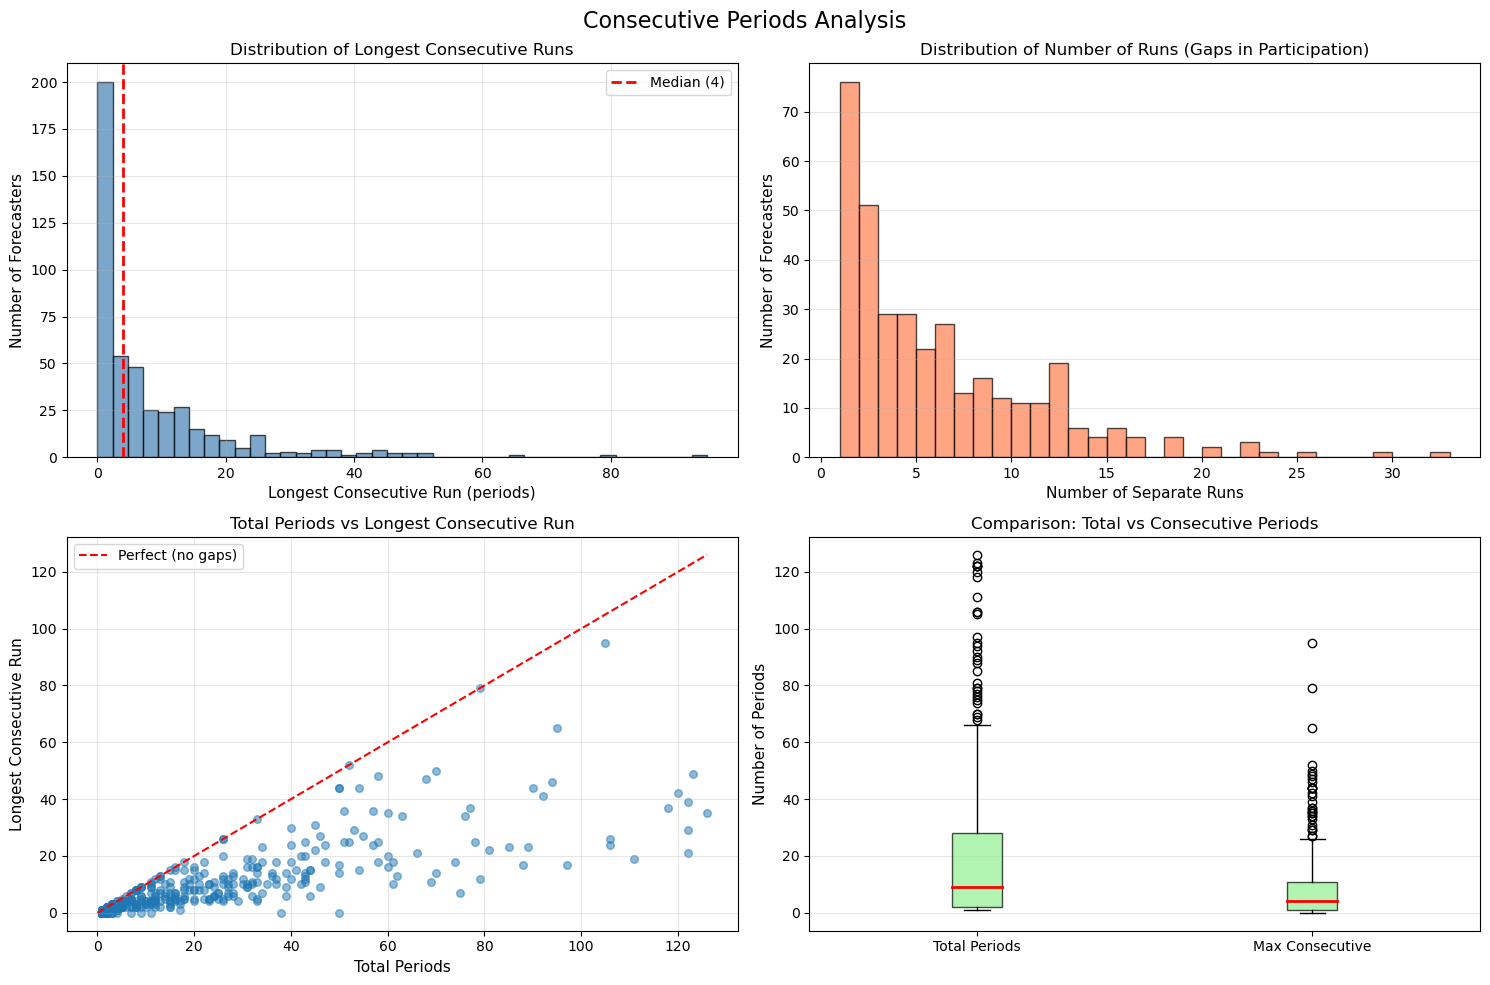


ASSESSMENT: Consecutive Periods for Performance Estimation
Median longest consecutive run: 4 periods
Forecasters with ≥10 consecutive periods: 135 (29.2%)
Forecasters with ≥20 consecutive periods: 54 (11.7%)

Forecasters with continuous participation (no gaps): 76 (16.5%)


In [10]:
# Visualize consecutive periods analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Consecutive Periods Analysis', fontsize=16)


# 1. Distribution of longest consecutive runs
axes[0, 0].hist(consecutive_df['max_consecutive'].values, bins=40, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].axvline(consecutive_df['max_consecutive'].median(), color='red', linestyle='--', linewidth=2, label=f'Median ({consecutive_df["max_consecutive"].median():.0f})')
axes[0, 0].set_xlabel('Longest Consecutive Run (periods)', fontsize=11)
axes[0, 0].set_ylabel('Number of Forecasters', fontsize=11)
axes[0, 0].set_title('Distribution of Longest Consecutive Runs', fontsize=12)
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2. Number of separate runs
axes[0, 1].hist(consecutive_df['num_runs'].values, bins=range(1, consecutive_df['num_runs'].max()+2), edgecolor='black', alpha=0.7, color='coral')
axes[0, 1].set_xlabel('Number of Separate Runs', fontsize=11)
axes[0, 1].set_ylabel('Number of Forecasters', fontsize=11)
axes[0, 1].set_title('Distribution of Number of Runs (Gaps in Participation)', fontsize=12)
axes[0, 1].grid(alpha=0.3, axis='y')

# 3. Scatter: Total periods vs Max consecutive
axes[1, 0].scatter(consecutive_df['total_periods'], consecutive_df['max_consecutive'], alpha=0.5, s=30)
axes[1, 0].plot([0, consecutive_df['total_periods'].max()], [0, consecutive_df['total_periods'].max()], 'r--', label='Perfect (no gaps)')
axes[1, 0].set_xlabel('Total Periods', fontsize=11)
axes[1, 0].set_ylabel('Longest Consecutive Run', fontsize=11)
axes[1, 0].set_title('Total Periods vs Longest Consecutive Run', fontsize=12)
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# 4. Box plot comparison
data_to_plot = [consecutive_df['total_periods'].values, consecutive_df['max_consecutive'].values]
axes[1, 1].boxplot(data_to_plot, labels=['Total Periods', 'Max Consecutive'], patch_artist=True,
                   boxprops=dict(facecolor='lightgreen', alpha=0.7),
                   medianprops=dict(color='red', linewidth=2))
axes[1, 1].set_ylabel('Number of Periods', fontsize=11)
axes[1, 1].set_title('Comparison: Total vs Consecutive Periods', fontsize=12)
axes[1, 1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("ASSESSMENT: Consecutive Periods for Performance Estimation")
print("="*70)
print(f"Median longest consecutive run: {consecutive_df['max_consecutive'].median():.0f} periods")
print(f"Forecasters with ≥10 consecutive periods: {(consecutive_df['max_consecutive'] >= 10).sum()} ({(consecutive_df['max_consecutive'] >= 10).sum()/len(consecutive_df)*100:.1f}%)")
print(f"Forecasters with ≥20 consecutive periods: {(consecutive_df['max_consecutive'] >= 20).sum()} ({(consecutive_df['max_consecutive'] >= 20).sum()/len(consecutive_df)*100:.1f}%)")
print(f"\nForecasters with continuous participation (no gaps): {(consecutive_df['num_runs'] == 1).sum()} ({(consecutive_df['num_runs'] == 1).sum()/len(consecutive_df)*100:.1f}%)")

print("="*70)


The histograms below show the distribution of forecast values for different groups of forecasters based on their participation level in the survey.

Number of unique forecasters: 462


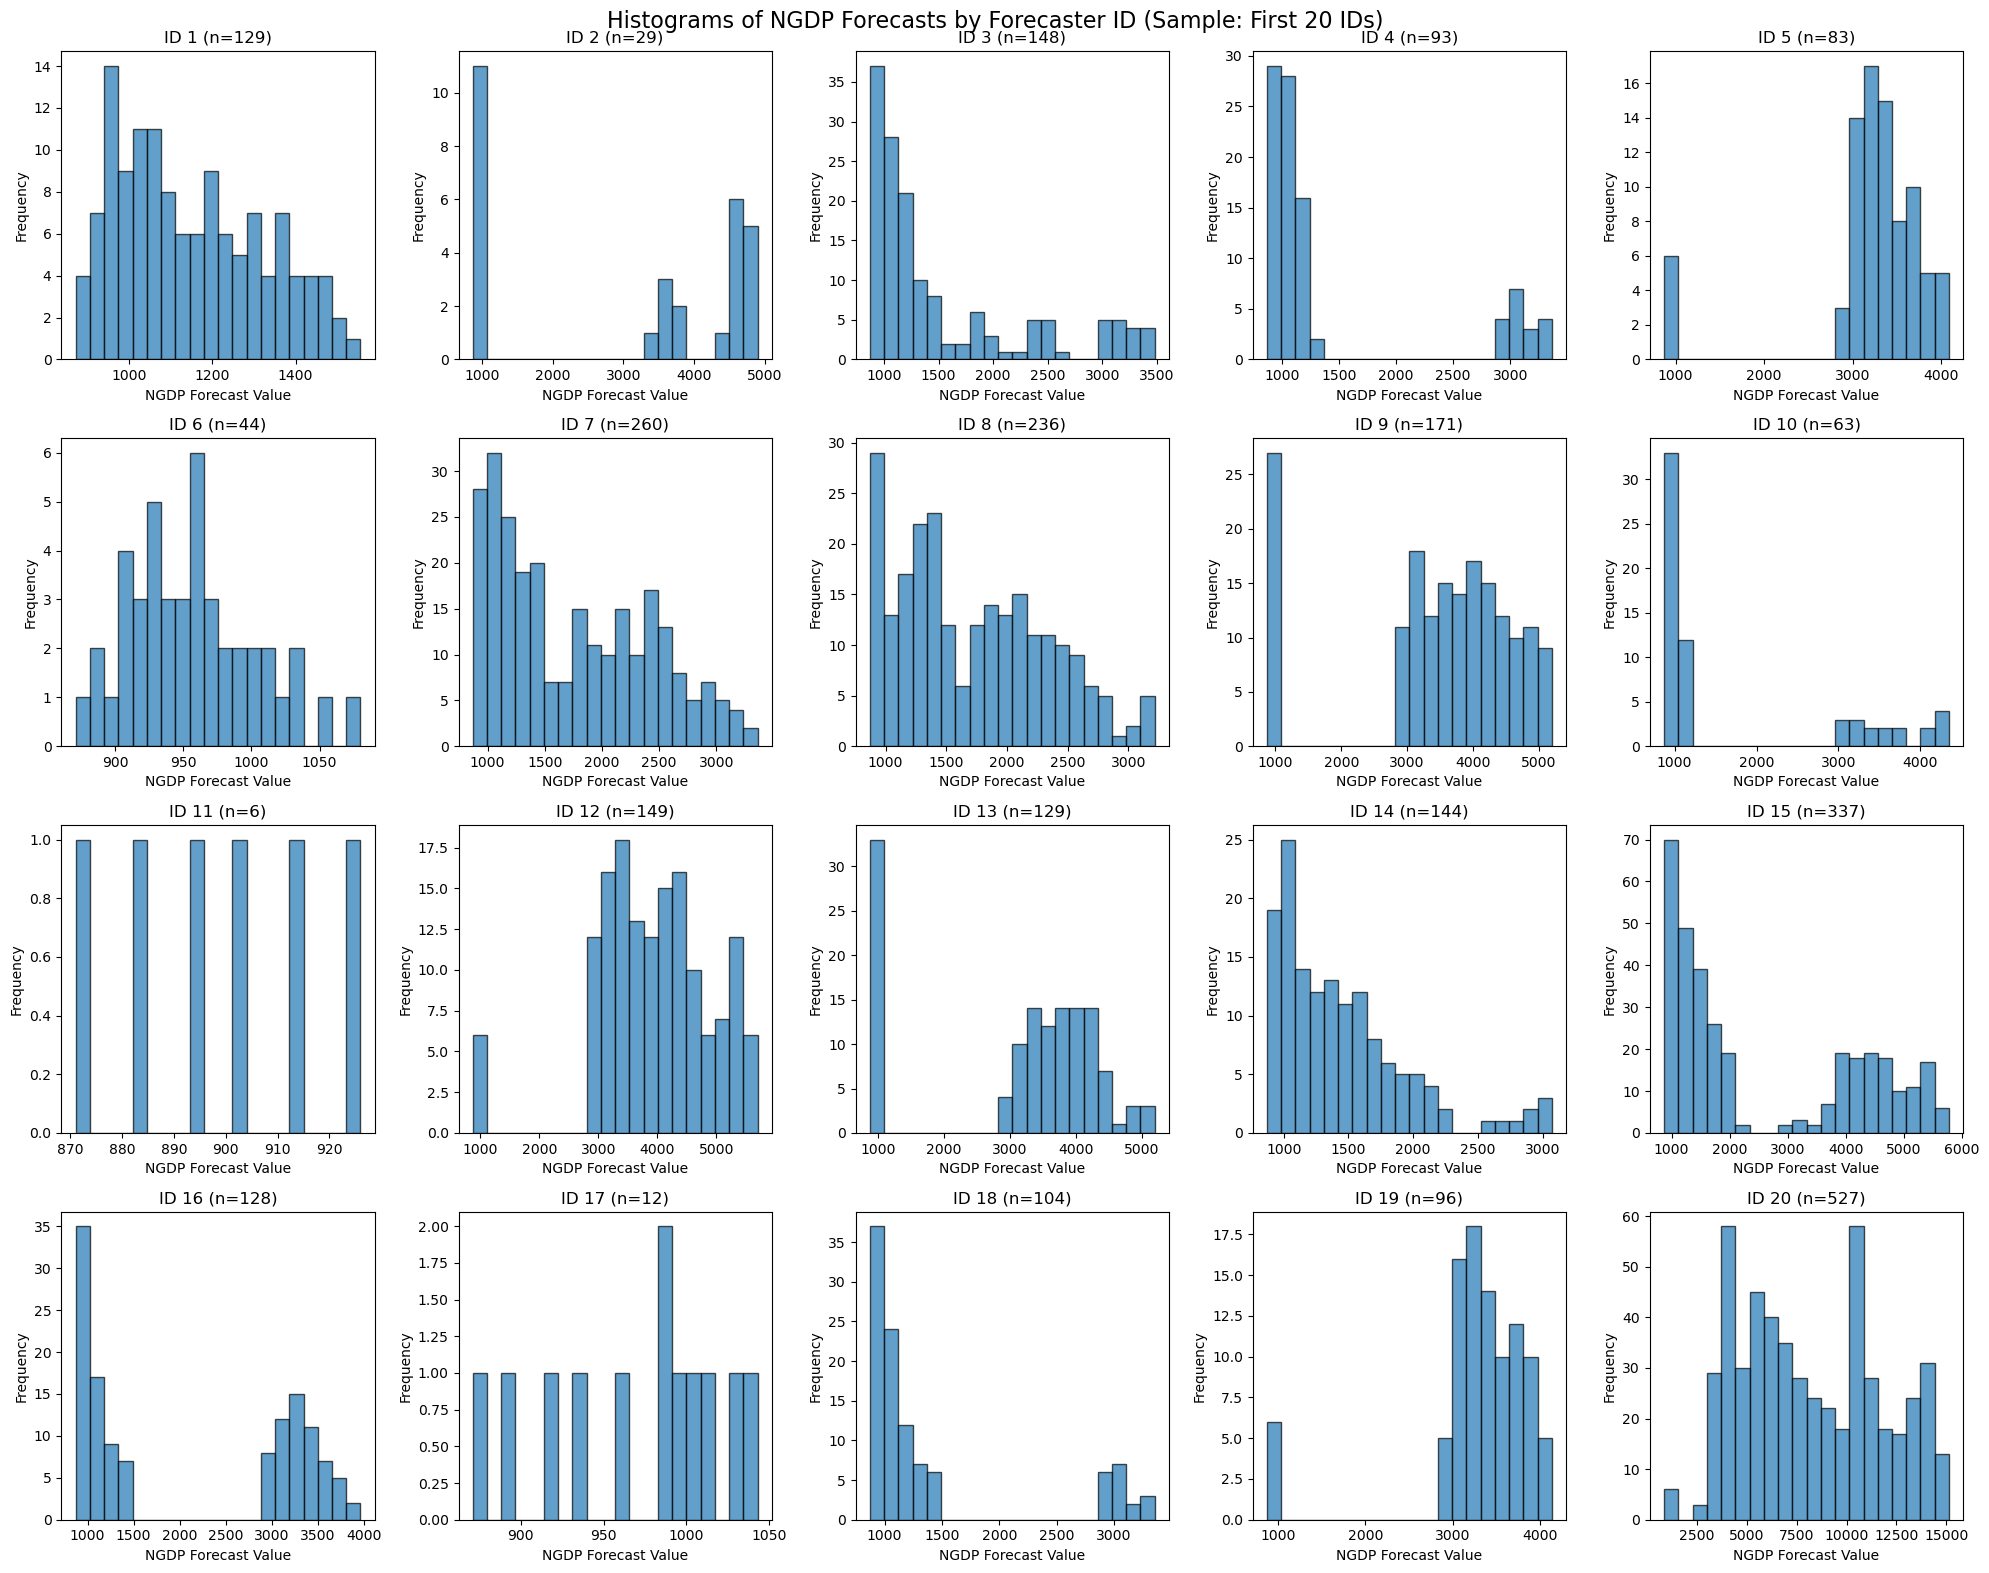


Summary for sample forecasters:
ID 1: 129 forecasts, range [871.0, 1556.0], mean 1147.0
ID 2: 29 forecasts, range [871.0, 4900.0], mean 3035.7
ID 3: 148 forecasts, range [871.0, 3479.0], mean 1536.0
ID 4: 93 forecasts, range [871.0, 3364.0], mean 1437.1
ID 5: 83 forecasts, range [871.0, 4085.0], mean 3207.2


In [11]:
# Create histograms for each forecaster ID's time series
# We'll focus on the forecast columns (NGDP1-NGDP6)
forecast_cols = ['NGDP1', 'NGDP2', 'NGDP3', 'NGDP4', 'NGDP5', 'NGDP6']

# Get unique forecaster IDs
unique_ids = sorted(df['ID'].unique())
print(f"Number of unique forecasters: {len(unique_ids)}")

# Since we have 462 forecasters, let's plot histograms for a sample first
# Let's look at the first 20 forecasters to understand the pattern
sample_ids = unique_ids[:20]

# Create subplots for the sample
fig, axes = plt.subplots(4, 5, figsize=(20, 16))
fig.suptitle('Histograms of NGDP Forecasts by Forecaster ID (Sample: First 20 IDs)', fontsize=16)

for i, forecaster_id in enumerate(sample_ids):
    row, col = i // 5, i % 5
    
    # Get data for this forecaster
    forecaster_data = df[df['ID'] == forecaster_id]
    
    # Combine all forecast values for this forecaster
    all_forecasts = []
    for col_name in forecast_cols:
        values = forecaster_data[col_name].dropna()
        all_forecasts.extend(values.tolist())
    
    # Plot histogram
    if all_forecasts:  # Only plot if we have data
        axes[row, col].hist(all_forecasts, bins=20, alpha=0.7, edgecolor='black')
        axes[row, col].set_title(f'ID {forecaster_id} (n={len(all_forecasts)})')
        axes[row, col].set_xlabel('NGDP Forecast Value')
        axes[row, col].set_ylabel('Frequency')
    else:
        axes[row, col].set_title(f'ID {forecaster_id} (No Data)')
        axes[row, col].text(0.5, 0.5, 'No Data', ha='center', va='center', transform=axes[row, col].transAxes)

plt.tight_layout()
plt.show()

# Print summary statistics for the sample
print("\nSummary for sample forecasters:")
for forecaster_id in sample_ids[:5]:  # Show stats for first 5
    forecaster_data = df[df['ID'] == forecaster_id]
    all_forecasts = []
    for col_name in forecast_cols:
        values = forecaster_data[col_name].dropna()
        all_forecasts.extend(values.tolist())
    
    if all_forecasts:
        print(f"ID {forecaster_id}: {len(all_forecasts)} forecasts, range [{min(all_forecasts):.1f}, {max(all_forecasts):.1f}], mean {np.mean(all_forecasts):.1f}")

In [52]:
# Distribution of Longest Consecutive Runs for all the sheets

# define a list to hold results
results = []

for indicator in xl_file.sheet_names:
    df_indicator = pd.read_excel("../data/SPFmicrodata.xlsx", sheet_name=indicator)
    forecast_cols = [col for col in df_indicator.columns if col.startswith(indicator)]
    # Create a time index for each row (year-quarter combination)
    df_indicator['time_index'] = (df_indicator['YEAR'] - df_indicator['YEAR'].min()) * 4 + (df_indicator['QUARTER'] - 1)

    
    # Analyze consecutive periods for each forecaster
    consecutive_stats = []
    for forecaster_id, group in df_indicator.groupby('ID'):
        max_consecutive, num_runs, all_runs = find_consecutive_runs(group, forecast_cols)
        
        # Also count total periods with at least one valid forecast
        total_periods_with_forecasts = 0
        for idx, row in group.iterrows():
            has_forecast = any(pd.notna(row[col]) for col in forecast_cols if col in row.index)
            if has_forecast:
                total_periods_with_forecasts += 1
        
        consecutive_stats.append({
            'ID': forecaster_id,
            'total_periods': len(group),  # Total rows in dataset
            'total_periods_with_forecasts': total_periods_with_forecasts,  # Periods with valid forecasts
            'max_consecutive': max_consecutive,
            'num_runs': num_runs,
            'all_runs': all_runs
        })

    consecutive_df = pd.DataFrame(consecutive_stats)

    # Store results
    median_longest = consecutive_df['max_consecutive'].median()
    mean_longest = consecutive_df['max_consecutive'].mean()
    forecasters_20_or_more = (consecutive_df['max_consecutive'] >= 20).sum()
    # append to the results list (do not reassign results = results.append(...) because list.append returns None)
    results.append({
        'Indicator': indicator,
        'Median_Longest_Run': median_longest,
        'Mean_Longest_Run': mean_longest,
        'Forecasterswith20orMore': int(forecasters_20_or_more)
    })

# convert to DataFrame 
results_df = pd.DataFrame(results)


/Users/Parimah/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/Users/Parimah/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/Users/Parimah/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/Users/Parimah/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/Users/Parimah/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/header_footer.py:48: UserWa

In [51]:
results_df

,Indicator,Median_Longest_Run,Mean_Longest_Run,Forecasterswith20orMore
0,NGDP,4.0,8.170996,54
1,PGDP,4.0,8.158009,53
2,CPROF,2.0,5.987013,33
3,UNEMP,4.0,8.437229,54
4,EMP,0.0,3.549784,31
5,INDPROD,4.0,7.629870,47
6,HOUSING,3.0,7.898268,52
7,TBILL,1.0,6.352814,46
8,BOND,1.0,4.876623,33
9,BAABOND,0.0,1.948052,15


In [ ]:
best_indicators = ["NGDP", "PGDP", "UNEMP", "INDPROD", "RGDP"] 
# according to median longest runs


/Users/Parimah/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")



=== Indicator: NGDP ===

Average longest consecutive run: 8.17 periods
Median longest consecutive run: 4.00 periods
Min consecutive run: 0 periods
Max consecutive run: 95 periods


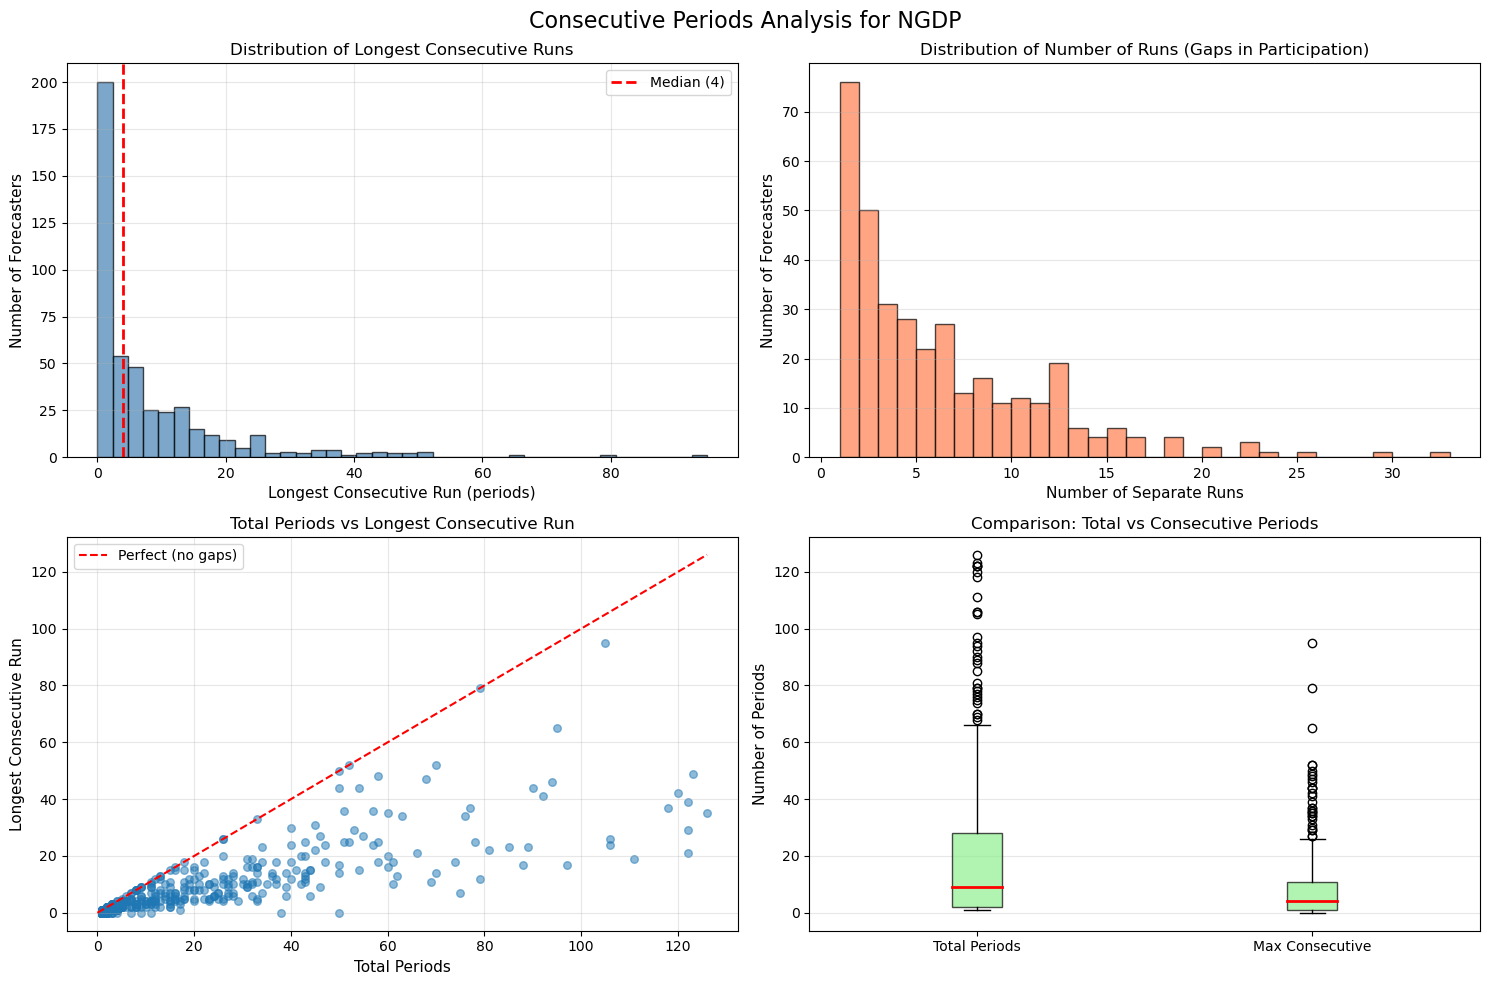


ASSESSMENT: Consecutive Periods for Performance Estimation
Median longest consecutive run: 4 periods
Forecasters with ≥30 consecutive periods: 27 (5.8%)
Forecasters with ≥40 consecutive periods: 15 (3.2%)

Forecasters with continuous participation (no gaps): 76 (16.5%)


/Users/Parimah/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")



=== Indicator: PGDP ===

Average longest consecutive run: 8.16 periods
Median longest consecutive run: 4.00 periods
Min consecutive run: 0 periods
Max consecutive run: 95 periods


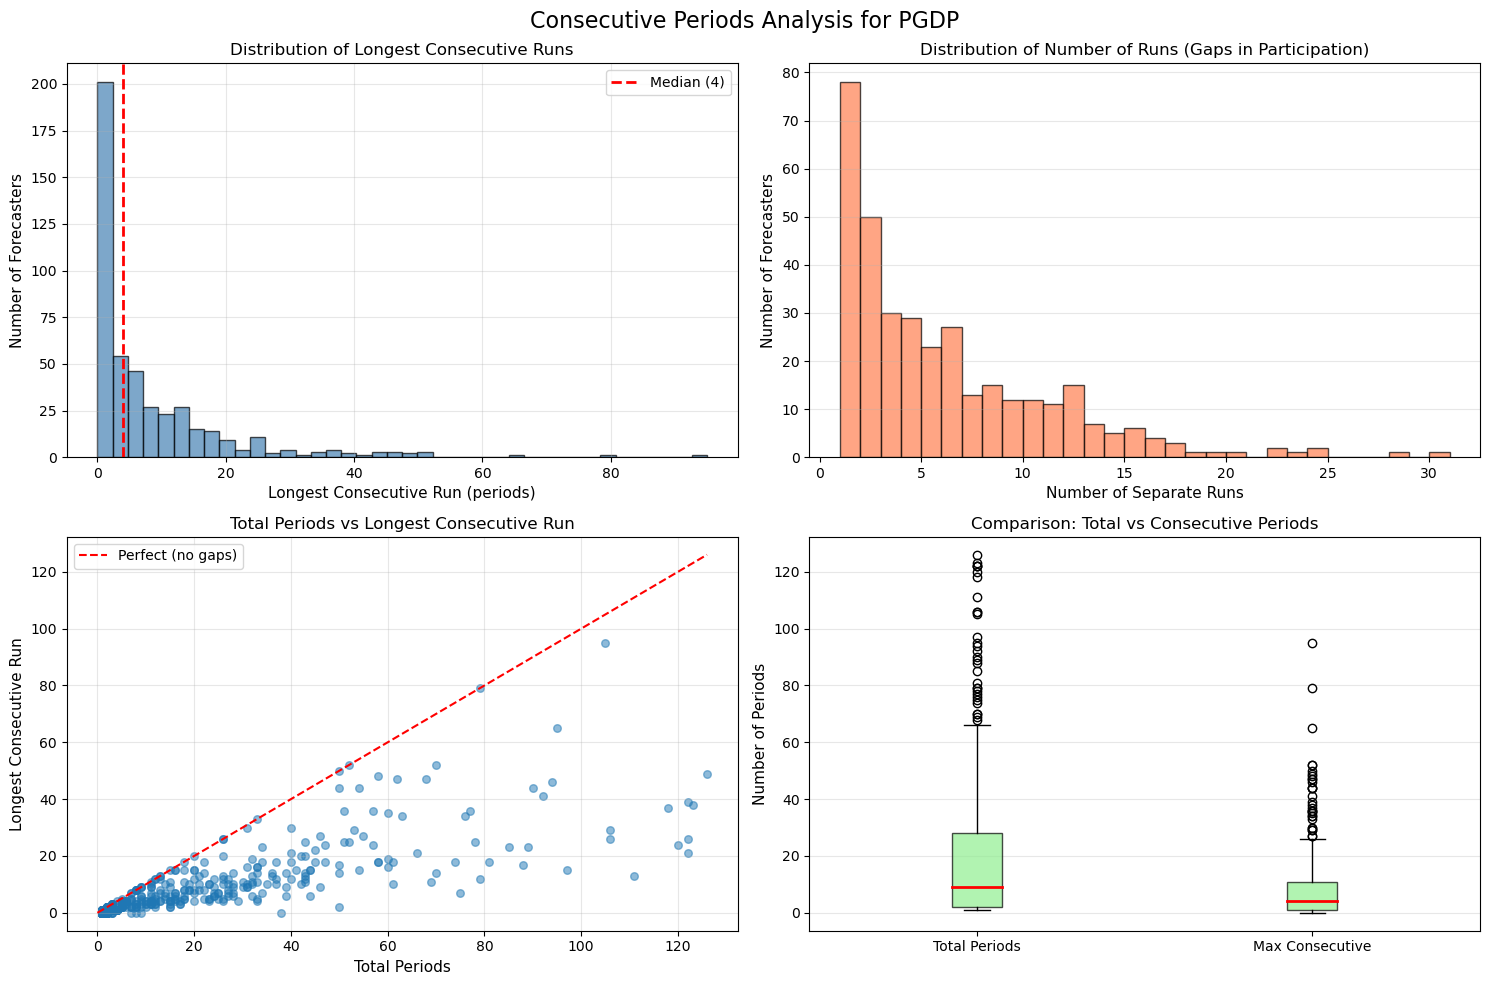


ASSESSMENT: Consecutive Periods for Performance Estimation
Median longest consecutive run: 4 periods
Forecasters with ≥30 consecutive periods: 27 (5.8%)
Forecasters with ≥40 consecutive periods: 15 (3.2%)

Forecasters with continuous participation (no gaps): 78 (16.9%)


/Users/Parimah/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")



=== Indicator: UNEMP ===

Average longest consecutive run: 8.44 periods
Median longest consecutive run: 4.00 periods
Min consecutive run: 0 periods
Max consecutive run: 95 periods


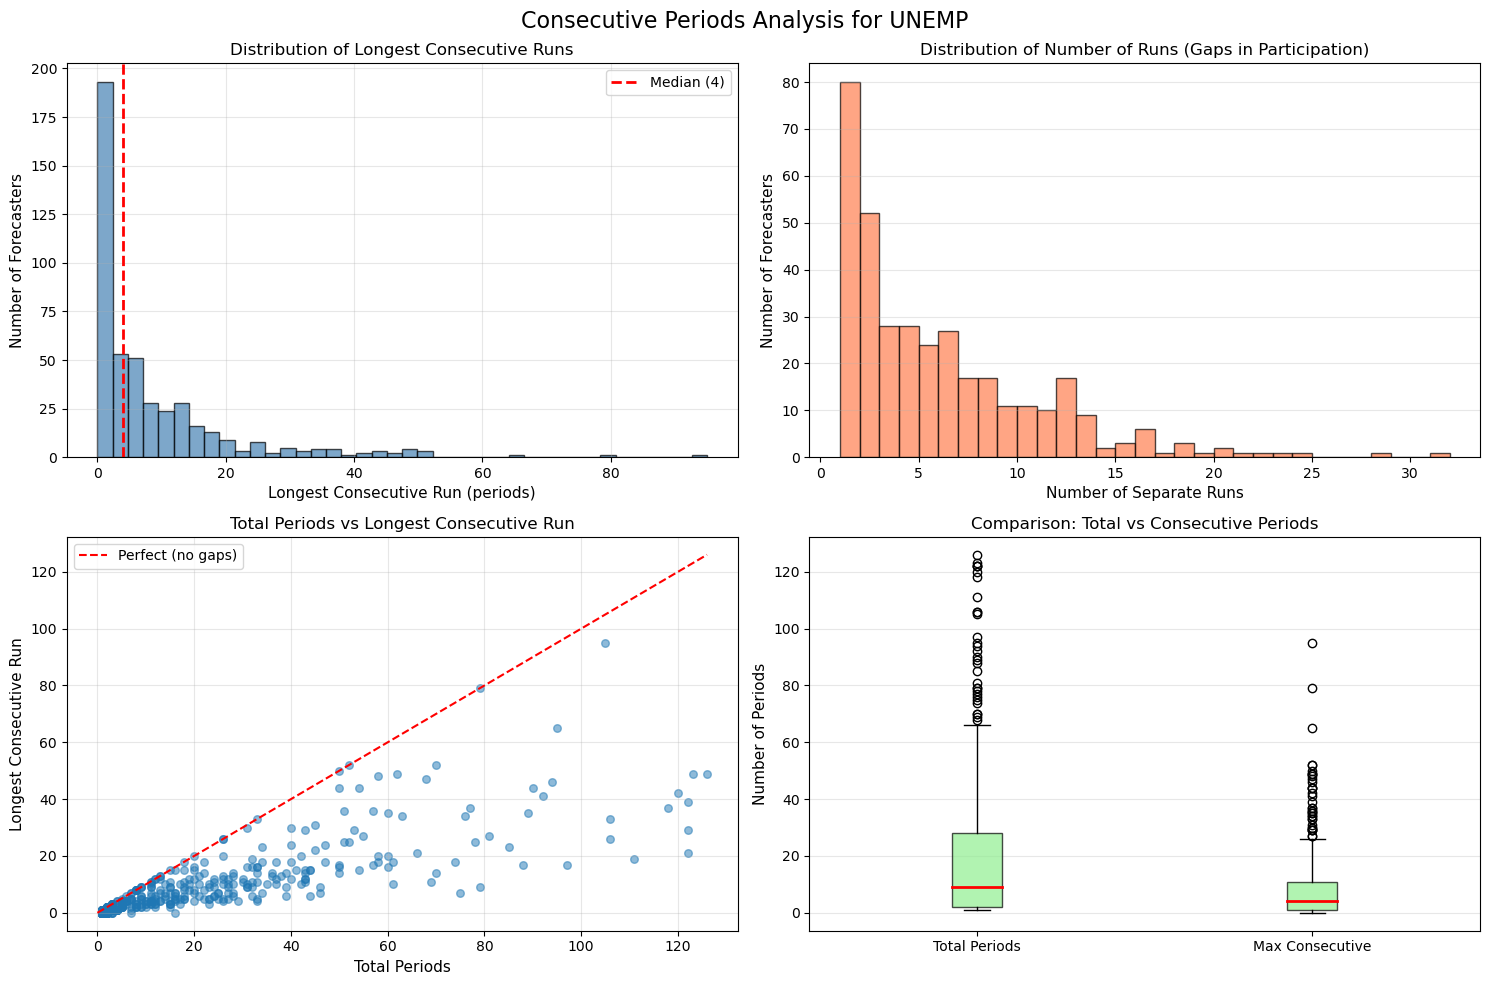


ASSESSMENT: Consecutive Periods for Performance Estimation
Median longest consecutive run: 4 periods
Forecasters with ≥30 consecutive periods: 31 (6.7%)
Forecasters with ≥40 consecutive periods: 17 (3.7%)

Forecasters with continuous participation (no gaps): 80 (17.3%)


/Users/Parimah/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")



=== Indicator: INDPROD ===

Average longest consecutive run: 7.63 periods
Median longest consecutive run: 4.00 periods
Min consecutive run: 0 periods
Max consecutive run: 95 periods


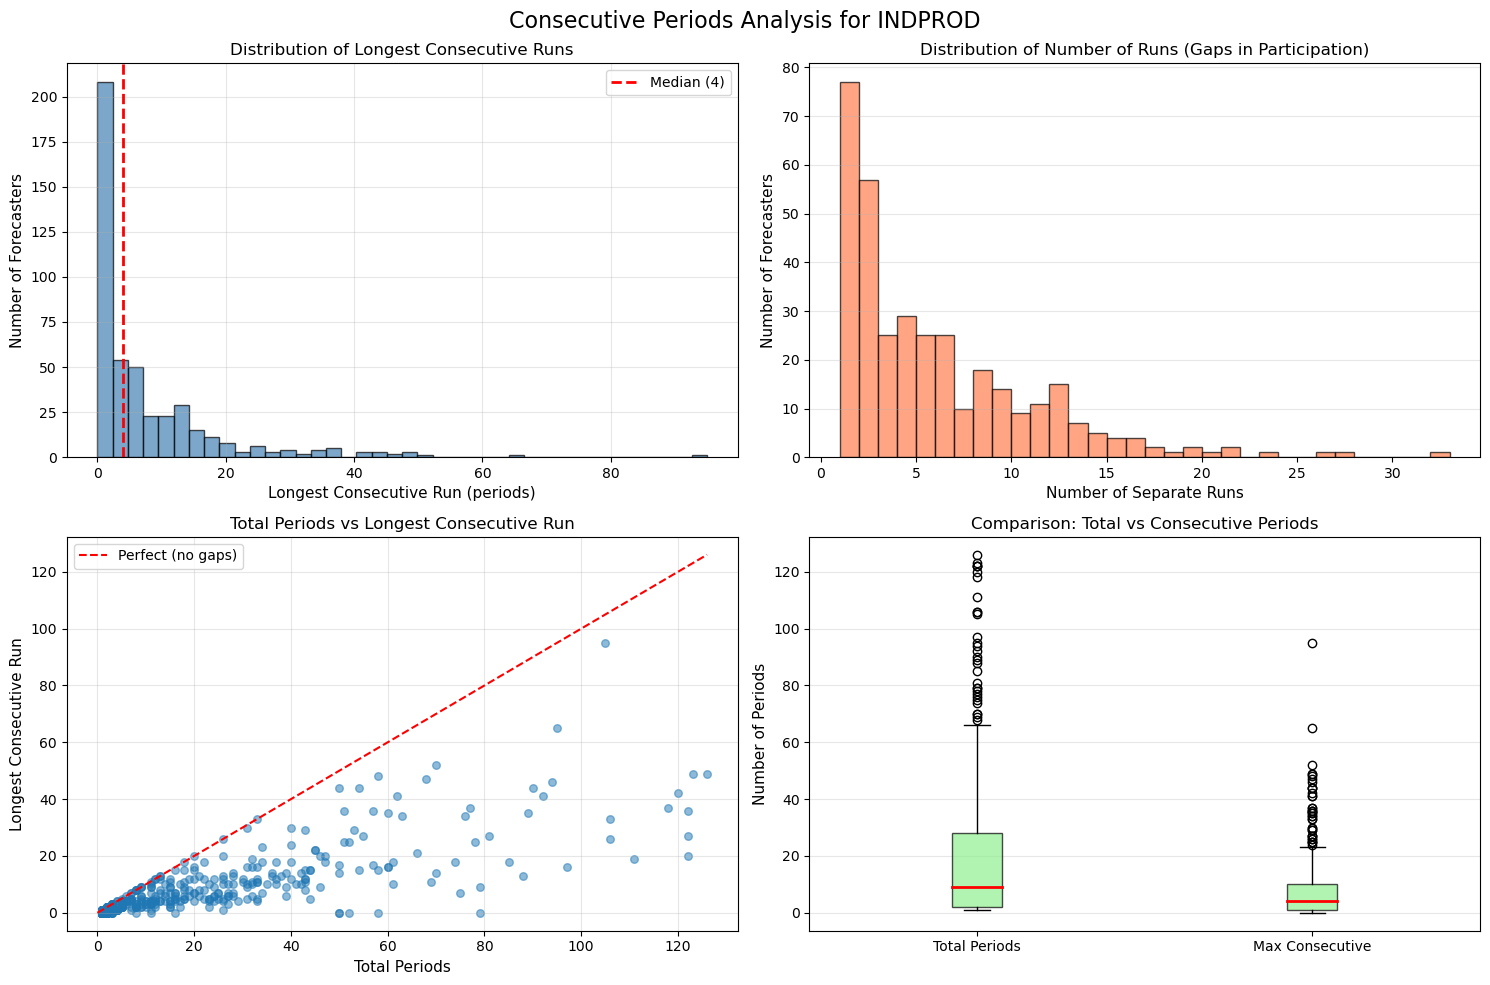


ASSESSMENT: Consecutive Periods for Performance Estimation
Median longest consecutive run: 4 periods
Forecasters with ≥30 consecutive periods: 27 (5.8%)
Forecasters with ≥40 consecutive periods: 14 (3.0%)

Forecasters with continuous participation (no gaps): 77 (16.7%)


/Users/Parimah/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")



=== Indicator: RGDP ===

Average longest consecutive run: 8.26 periods
Median longest consecutive run: 4.00 periods
Min consecutive run: 0 periods
Max consecutive run: 79 periods


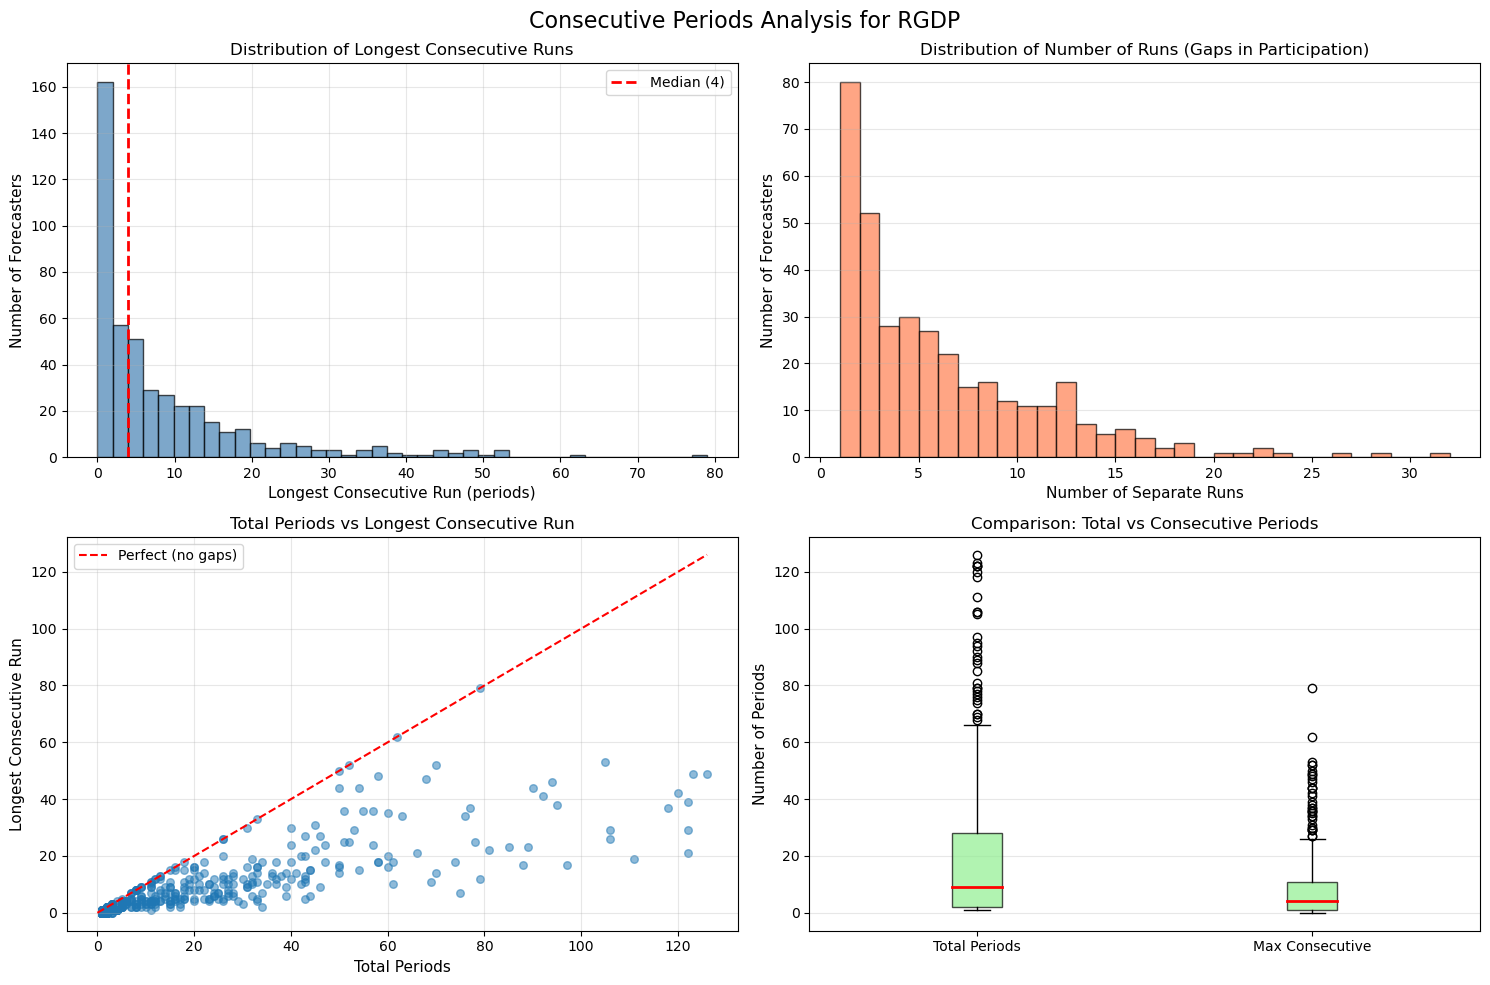


ASSESSMENT: Consecutive Periods for Performance Estimation
Median longest consecutive run: 4 periods
Forecasters with ≥30 consecutive periods: 30 (6.5%)
Forecasters with ≥40 consecutive periods: 16 (3.5%)

Forecasters with continuous participation (no gaps): 80 (17.3%)


In [80]:
# Distribution of Longest Consecutive Runs for all the sheets

for indicator in best_indicators:
    df_indicator = pd.read_excel("../data/SPFmicrodata.xlsx", sheet_name=indicator)
    forecast_cols = [col for col in df_indicator.columns if col.startswith(indicator)]
    # Create a time index for each row (year-quarter combination)
    df_indicator['time_index'] = (df_indicator['YEAR'] - df_indicator['YEAR'].min()) * 4 + (df_indicator['QUARTER'] - 1)
   
    # Analyze consecutive periods for each forecaster
    consecutive_stats = []
    for forecaster_id, group in df_indicator.groupby('ID'):
        max_consecutive, num_runs, all_runs = find_consecutive_runs(group, forecast_cols)
        
        # Also count total periods with at least one valid forecast
        total_periods_with_forecasts = 0
        for idx, row in group.iterrows():
            has_forecast = any(pd.notna(row[col]) for col in forecast_cols if col in row.index)
            if has_forecast:
                total_periods_with_forecasts += 1
        
        consecutive_stats.append({
            'ID': forecaster_id,
            'total_periods': len(group),  # Total rows in dataset
            'total_periods_with_forecasts': total_periods_with_forecasts,  # Periods with valid forecasts
            'max_consecutive': max_consecutive,
            'num_runs': num_runs,
            'all_runs': all_runs
        })

    consecutive_df = pd.DataFrame(consecutive_stats)

    print(f"\n=== Indicator: {indicator} ===")
    print(f"\nAverage longest consecutive run: {consecutive_df['max_consecutive'].mean():.2f} periods")
    print(f"Median longest consecutive run: {consecutive_df['max_consecutive'].median():.2f} periods")
    print(f"Min consecutive run: {consecutive_df['max_consecutive'].min()} periods")
    print(f"Max consecutive run: {consecutive_df['max_consecutive'].max()} periods")

    # Visualize consecutive periods analysis
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'Consecutive Periods Analysis for {indicator}', fontsize=16)


    # 1. Distribution of longest consecutive runs
    axes[0, 0].hist(consecutive_df['max_consecutive'].values, bins=40, edgecolor='black', alpha=0.7, color='steelblue')
    axes[0, 0].axvline(consecutive_df['max_consecutive'].median(), color='red', linestyle='--', linewidth=2, label=f'Median ({consecutive_df["max_consecutive"].median():.0f})')
    axes[0, 0].set_xlabel('Longest Consecutive Run (periods)', fontsize=11)
    axes[0, 0].set_ylabel('Number of Forecasters', fontsize=11)
    axes[0, 0].set_title('Distribution of Longest Consecutive Runs', fontsize=12)
    axes[0, 0].legend()
    axes[0, 0].grid(alpha=0.3)

    # 2. Number of separate runs
    axes[0, 1].hist(consecutive_df['num_runs'].values, bins=range(1, consecutive_df['num_runs'].max()+2), edgecolor='black', alpha=0.7, color='coral')
    axes[0, 1].set_xlabel('Number of Separate Runs', fontsize=11)
    axes[0, 1].set_ylabel('Number of Forecasters', fontsize=11)
    axes[0, 1].set_title('Distribution of Number of Runs (Gaps in Participation)', fontsize=12)
    axes[0, 1].grid(alpha=0.3, axis='y')

    # 3. Scatter: Total periods vs Max consecutive
    axes[1, 0].scatter(consecutive_df['total_periods'], consecutive_df['max_consecutive'], alpha=0.5, s=30)
    axes[1, 0].plot([0, consecutive_df['total_periods'].max()], [0, consecutive_df['total_periods'].max()], 'r--', label='Perfect (no gaps)')
    axes[1, 0].set_xlabel('Total Periods', fontsize=11)
    axes[1, 0].set_ylabel('Longest Consecutive Run', fontsize=11)
    axes[1, 0].set_title('Total Periods vs Longest Consecutive Run', fontsize=12)
    axes[1, 0].legend()
    axes[1, 0].grid(alpha=0.3)

    # 4. Box plot comparison
    data_to_plot = [consecutive_df['total_periods'].values, consecutive_df['max_consecutive'].values]
    axes[1, 1].boxplot(data_to_plot, labels=['Total Periods', 'Max Consecutive'], patch_artist=True,
                    boxprops=dict(facecolor='lightgreen', alpha=0.7),
                    medianprops=dict(color='red', linewidth=2))
    axes[1, 1].set_ylabel('Number of Periods', fontsize=11)
    axes[1, 1].set_title('Comparison: Total vs Consecutive Periods', fontsize=12)
    axes[1, 1].grid(alpha=0.3, axis='y')

    plt.tight_layout()
    plt.show()

    print("\n" + "="*70)
    print("ASSESSMENT: Consecutive Periods for Performance Estimation")
    print("="*70)
    print(f"Median longest consecutive run: {consecutive_df['max_consecutive'].median():.0f} periods")
    print(f"Forecasters with ≥30 consecutive periods: {(consecutive_df['max_consecutive'] >= 30).sum()} ({(consecutive_df['max_consecutive'] >= 30).sum()/len(consecutive_df)*100:.1f}%)")
    print(f"Forecasters with ≥40 consecutive periods: {(consecutive_df['max_consecutive'] >= 40).sum()} ({(consecutive_df['max_consecutive'] >= 40).sum()/len(consecutive_df)*100:.1f}%)")
    print(f"\nForecasters with continuous participation (no gaps): {(consecutive_df['num_runs'] == 1).sum()} ({(consecutive_df['num_runs'] == 1).sum()/len(consecutive_df)*100:.1f}%)")

    print("="*70)


In [70]:
df.groupby('ID')

In [76]:
# which forecasters have more than 50 NGDP1 forecasts
forecasters_50_or_more = df.groupby('ID').filter(lambda x: x['NGDP1'].count() >= 100)
forecaster_ids_50_or_more = forecasters_50_or_more['ID'].unique()
print(f"Forecasters with 50 or more NGDP1 forecasts: {len(forecaster_ids_50_or_more)}") 


Forecasters with 50 or more NGDP1 forecasts: 11


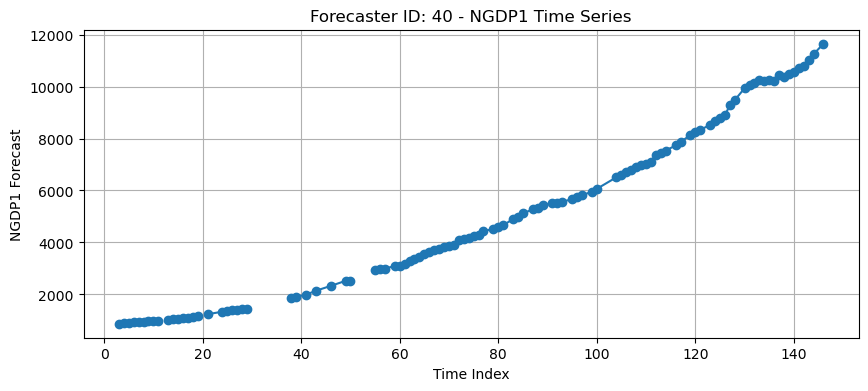

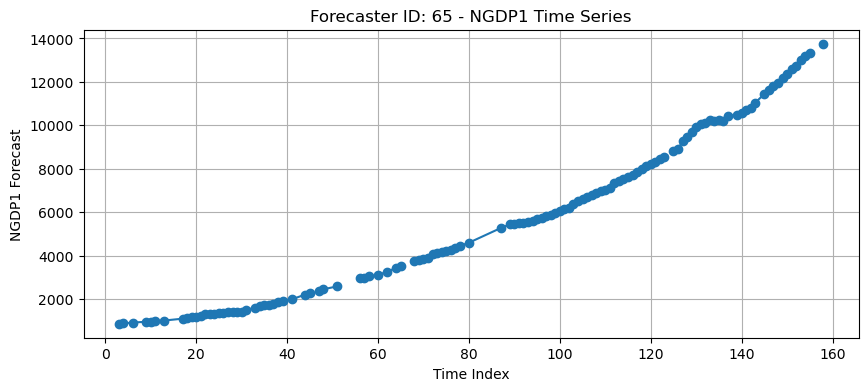

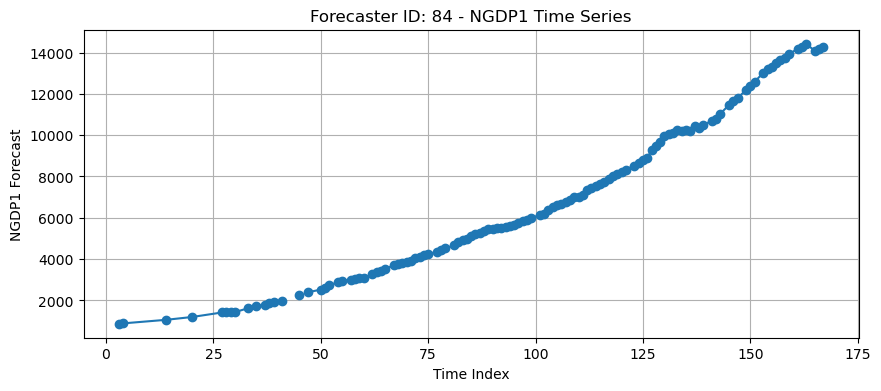

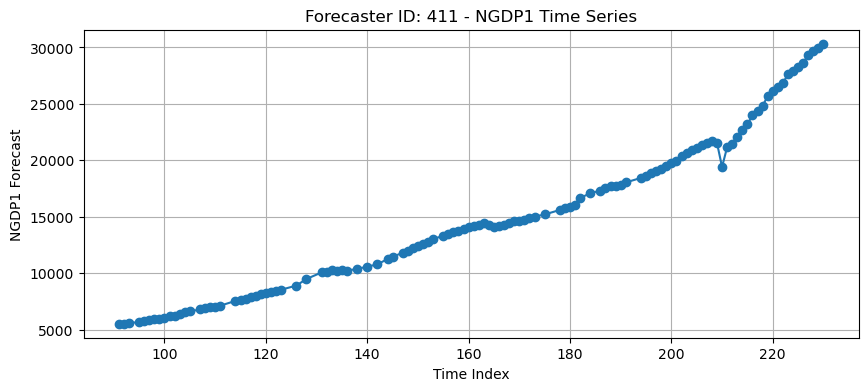

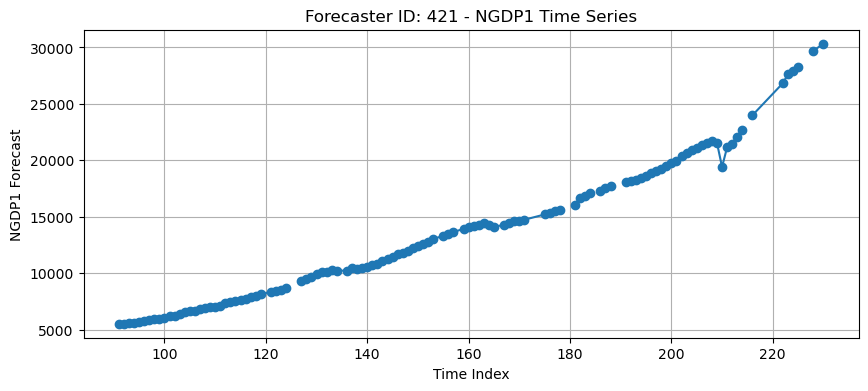

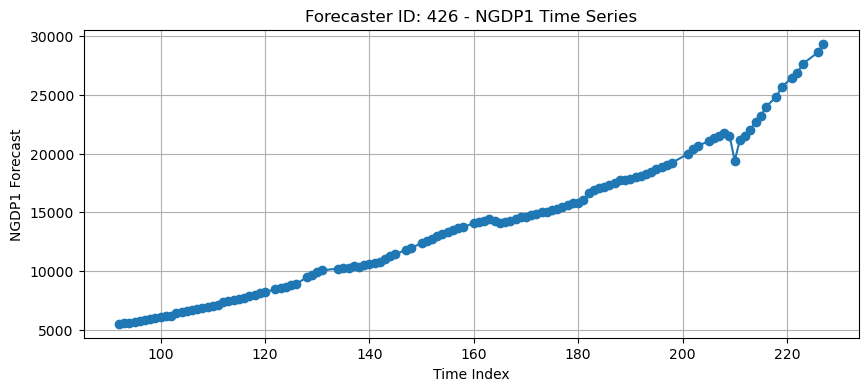

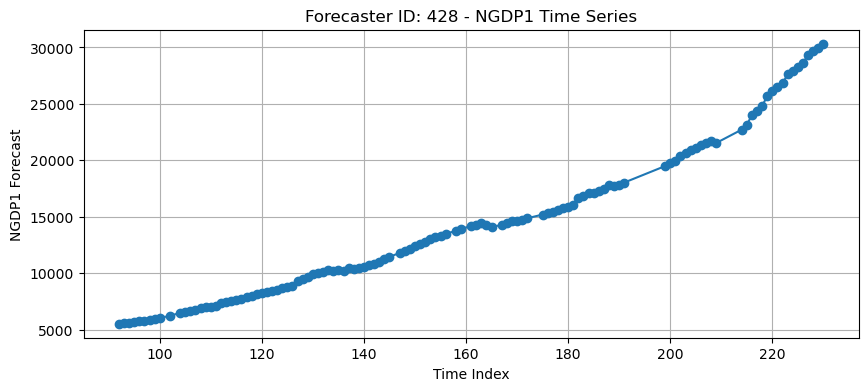

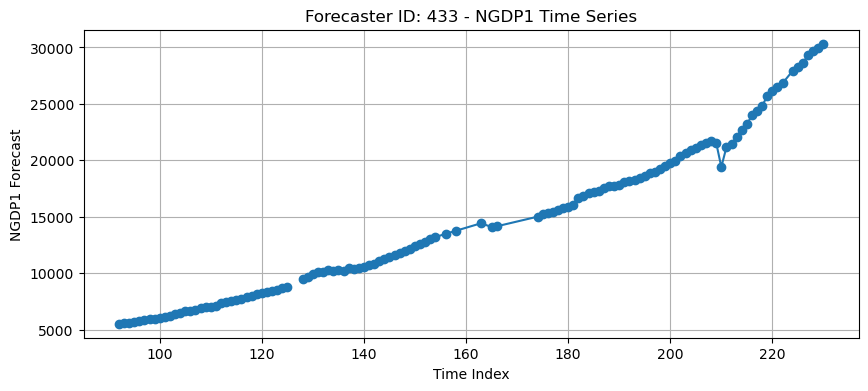

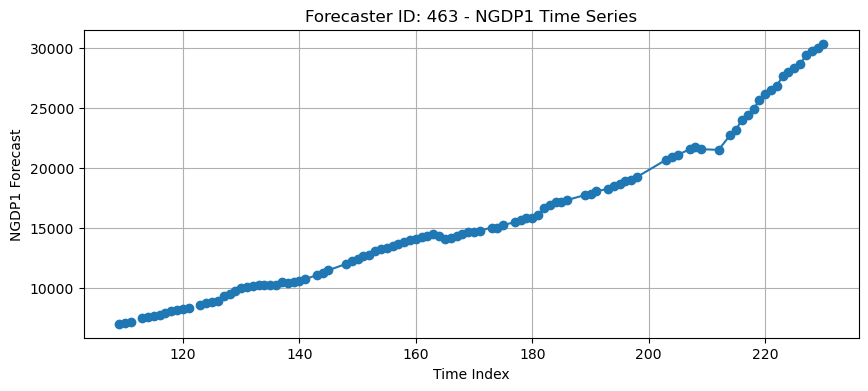

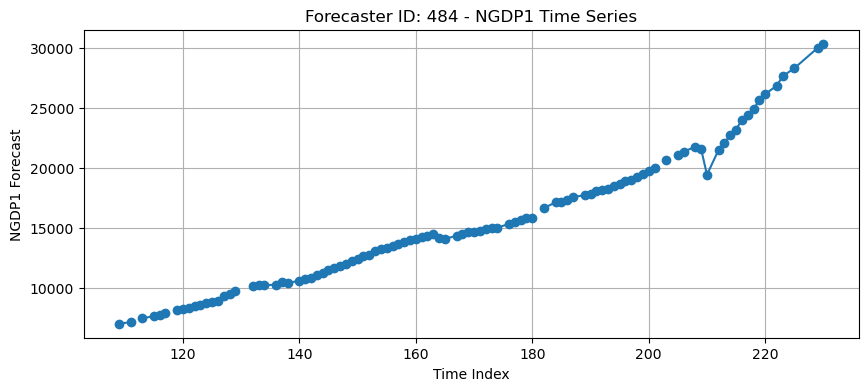

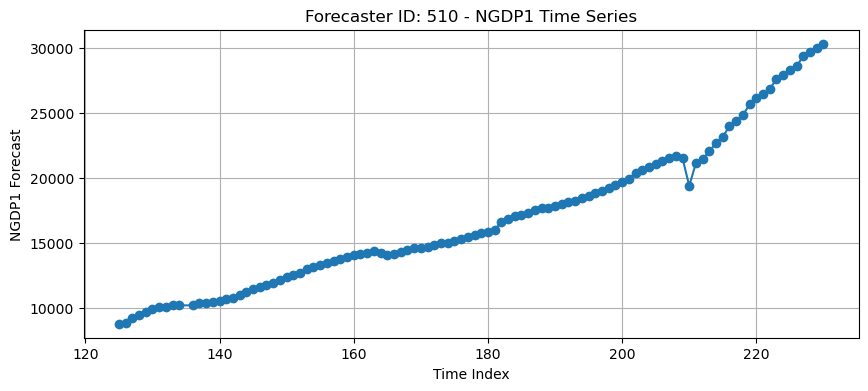

In [79]:
# plot the time series of df["NGDP1"] for each forecaster ID


for forecaster_id in forecaster_ids_50_or_more:
    forecaster_data = df[df['ID'] == forecaster_id]
    forecaster_data.count()
    plt.figure(figsize=(10, 4))
    plt.plot(forecaster_data['time_index'], forecaster_data['NGDP1'], marker='o', linestyle='-')
    plt.title(f'Forecaster ID: {forecaster_id} - NGDP1 Time Series')
    plt.xlabel('Time Index')
    plt.ylabel('NGDP1 Forecast')
    plt.grid()
    plt.show()


for each forecaster we define a forecast quality parameter.

In [4]:
theta_hat = df.groupby("forecaster").apply(
    lambda x: np.mean((x["forecast"] - x["realized"])**2)
)

In [5]:
theta_hat

forecaster
F1    0.605878
F2    0.977196
F3    0.649940
F4    1.095245
F5    1.367791
dtype: float64

Each $\hat{\theta}_j$ is a sample mean of squared errors.
If we assume errors are i.i.d. over (m,t), the standard error can be estimated as:

In [6]:
se_theta = df.groupby("forecaster").apply(
    lambda x: np.std((x["forecast"] - x["realized"])**2, ddof=1) / np.sqrt(len(x))
)


In [7]:
se_theta

forecaster
F1    0.105516
F2    0.230998
F3    0.111348
F4    0.180022
F5    0.228062
dtype: float64

### Pairwise differences and rank inference